## Datan analysointi S2022 - Tehtävät kerta 6

**Muista** kirjoittaa alle omat tietosi. **Opiskelijan nimi:**

In [1]:
student_name = 'Kati Tuunainen'
student_id = 'AC8409'

## Aineisto ja esikäsittely
### Aineisto
Tehdään datalle tarvittava esikäsittely. Aineisto on Telian osakekurssit vuodelta 2018. ts. kyseessä on aikasarjadata.

In [2]:
# Kirjastojen lataaminen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Datan esikäsittely.
Luetaan aluksi data sellaisenaan, mikä ei tässä tehtävässä ole oikea ratkaisu, mutta saadaan kuitenkin jotakin tietoa näytettyä DataFramessa.

In [3]:
import pandas as pd

# Asetetaan datalähde, josta data löytyy
url_src = "https://student.labranet.jamk.fi/~pelju/datanav_k22/topic6/data/telia2018.csv"

df = pd.read_csv(url_src, sep= ';')
df.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2018-12-28,"4,078","4,083","4,00","4,117","3,995","4,076","4,083",988115,"4034300,94",1075,NaN
1,2018-12-27,"4,002","4,008","4,087","4,112","3,99","3,995","4,055",1195487,"4848035,58",1377,NaN
2,2018-12-21,"4,123","4,125","4,12","4,143","4,043","4,122","4,10",919570,"3770429,07",1096,NaN
3,2018-12-20,"4,169","4,174","4,151","4,186","4,119","4,163","4,162",941170,"3917348,22",1036,NaN
4,2018-12-19,"4,183","4,186","4,17","4,213","4,17","4,18","4,191",651864,"2732150,44",698,NaN


### Luetaan tiedosto DataFrameen aikasarjana (T6.1 / 1p)
Luetaan tiedosto, mutta asetetaan tuotettavaan DataFrameen vain muutama sarake, jonka arvoista olemme kiinnostuneita. Asetetaan Date-sarake DataFrame-taulukon indeksiksi, jolloin saamme päivämäärän indeksikentäksi.

Toteuta seuraavat kohdat tässä tehtävässä:

- parsi päivämääräkenttä Date-päivämäärämuotoon
- Aseta Date-kenttä DataFramen indeksisarakkeeksi ja poista Date-kenttä DataFramen sarakkeista
- Lopputuloksena DataFramessa on Date-indeksin lisäksi seuraavat sarakkeet: Opening price, High price, Low price, Closing price, Total volume eli poista muut sarakkeet jo tässä vaiheessa

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m.%d')
df = df.set_index('Date')
df = df.loc[:, ['Opening price', 'High price', 'Low price', 'Closing price', 'Total volume']]

df

,Opening price,High price,Low price,Closing price,Total volume
Date,,,,,
2018-12-28,"4,00","4,117","3,995","4,076",988115
2018-12-27,"4,087","4,112","3,99","3,995",1195487
2018-12-21,"4,12","4,143","4,043","4,122",919570
2018-12-20,"4,151","4,186","4,119","4,163",941170
2018-12-19,"4,17","4,213","4,17","4,18",651864
...,...,...,...,...,...
2018-01-08,"3,85","3,86","3,824","3,845",2151101
2018-01-05,"3,78","3,85","3,777","3,85",1306020
2018-01-04,"3,76","3,786","3,756","3,78",1540541


In [5]:
df.dtypes

Opening price    object
High price       object
Low price        object
Closing price    object
Total volume      int64
dtype: object

### Järjestetään tiedot (T6.2 / 1p)
Toteuta seuraavat kohdat tässä tehtävässä:

- Tulosta ensimmäiset kymmenen päivää Date arvon perusteella
- Tulosta tulokset järjestettynä Total volume-kentän mukaan (suurin arvo ensimmäisenä).
- Luo myös uusi kenttä High - Low, joka sisältää korkeimman hinnan ja matalimman hinnan välisen erotuksen

In [6]:
# Tulosta ensimmäiset kymmenen päivää `Date` arvon perusteella
df = df.sort_index(ascending=True)
df = df.head(10)
df

,Opening price,High price,Low price,Closing price,Total volume
Date,,,,,
2018-01-02,"3,75","3,752","3,718","3,729",1717521
2018-01-03,"3,758","3,758","3,73","3,755",1823437
2018-01-04,"3,76","3,786","3,756","3,78",1540541
2018-01-05,"3,78","3,85","3,777","3,85",1306020
2018-01-08,"3,85","3,86","3,824","3,845",2151101
2018-01-09,"3,874","3,922","3,864","3,919",1970062
2018-01-10,"3,92","3,92","3,857","3,871",2070130
2018-01-11,"3,895","3,895","3,816","3,863",2735266
2018-01-12,"3,874","3,874","3,813","3,827",2671044


In [7]:
# Tulosta tulokset järjestettynä  `Total volume`-kentän mukaan suurimmasta pienimpään.
df= df.sort_values('Total volume', ascending=False)
df

,Opening price,High price,Low price,Closing price,Total volume
Date,,,,,
2018-01-11,"3,895","3,895","3,816","3,863",2735266
2018-01-12,"3,874","3,874","3,813","3,827",2671044
2018-01-08,"3,85","3,86","3,824","3,845",2151101
2018-01-10,"3,92","3,92","3,857","3,871",2070130
2018-01-09,"3,874","3,922","3,864","3,919",1970062
2018-01-03,"3,758","3,758","3,73","3,755",1823437
2018-01-02,"3,75","3,752","3,718","3,729",1717521
2018-01-04,"3,76","3,786","3,756","3,78",1540541
2018-01-05,"3,78","3,85","3,777","3,85",1306020


In [8]:
# Luo myös uusi kenttä `High - Low`, joka sisältää korkeimman hinnan ja matalimman hinnan välisen erotuksen ja tulosta dataframe.
df['High price'] = df['High price'].str.replace(',', '.').astype(float)
df['Low price'] = df['Low price'].str.replace(',', '.').astype(float)
df['High - Low'] = df['High price'] - df['Low price']

df

,Opening price,High price,Low price,Closing price,Total volume,High - Low
Date,,,,,,
2018-01-11,"3,895",3.895,3.816,"3,863",2735266,0.079
2018-01-12,"3,874",3.874,3.813,"3,827",2671044,0.061
2018-01-08,"3,85",3.860,3.824,"3,845",2151101,0.036
2018-01-10,"3,92",3.920,3.857,"3,871",2070130,0.063
2018-01-09,"3,874",3.922,3.864,"3,919",1970062,0.058
2018-01-03,"3,758",3.758,3.730,"3,755",1823437,0.028
2018-01-02,"3,75",3.752,3.718,"3,729",1717521,0.034
2018-01-04,"3,76",3.786,3.756,"3,78",1540541,0.030
2018-01-05,"3,78",3.850,3.777,"3,85",1306020,0.073


## Datan visualisointi (T6.3 / 1p)
Toteuta seuraavat kohdat tässä tehtävässä:

Visualisoi aikasarjadata haluamallasi tavalla.

- Valitse tähän ainakin kaksi eri kuvaajatyyppiä
- Visualisoi data kenttien 'Low price' ja 'High price' avulla
- Visualisoi esim. käyttäen rolling-operaattorin antama tasaisesti painotettu sarja
- Visualisoi antaen enemmän painoa tuoreimmille havainnoille (ewm (exponentially weighted moving) -operaattori). Tällainen sarja adaptoituu nopeammin muutoksiin kuin rolling-operaattorin antama tasaisesti painotettu sarja.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = "https://student.labranet.jamk.fi/~pelju/datanav_k22/topic6/data/telia2018.csv"

df = pd.read_csv(url, sep= ';', decimal=',', parse_dates=['Date'], dayfirst=True, index_col='Date')

df

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,
2018-12-28,4.078,4.083,4.000,4.117,3.995,4.076,4.083,988115,4034300.94,1075,NaN
2018-12-27,4.002,4.008,4.087,4.112,3.990,3.995,4.055,1195487,4848035.58,1377,NaN
2018-12-21,4.123,4.125,4.120,4.143,4.043,4.122,4.100,919570,3770429.07,1096,NaN
2018-12-20,4.169,4.174,4.151,4.186,4.119,4.163,4.162,941170,3917348.22,1036,NaN
2018-12-19,4.183,4.186,4.170,4.213,4.170,4.180,4.191,651864,2732150.44,698,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-08,3.835,3.838,3.850,3.860,3.824,3.845,3.840,2151101,8260135.45,1598,NaN
2018-01-05,3.829,3.833,3.780,3.850,3.777,3.850,3.817,1306020,4985385.21,992,NaN
2018-01-04,3.783,3.785,3.760,3.786,3.756,3.780,3.771,1540541,5808883.03,995,NaN


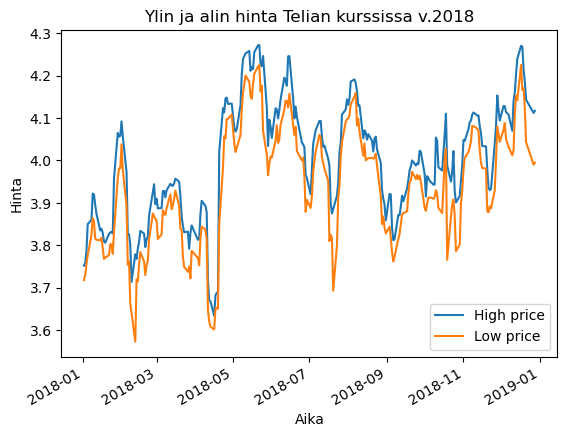

In [10]:
# Visualisoi data kenttien 'Low price' ja 'High price' avulla

df['High price'].plot()
df['Low price'].plot()

plt.xlabel('Aika')
plt.ylabel('Hinta')
plt.legend(loc= 'lower right')
plt.title('Ylin ja alin hinta Telian kurssissa v.2018')

plt.show()

Kuvaaja, jossa on mukana Rolling window 20 päivän ajalta.

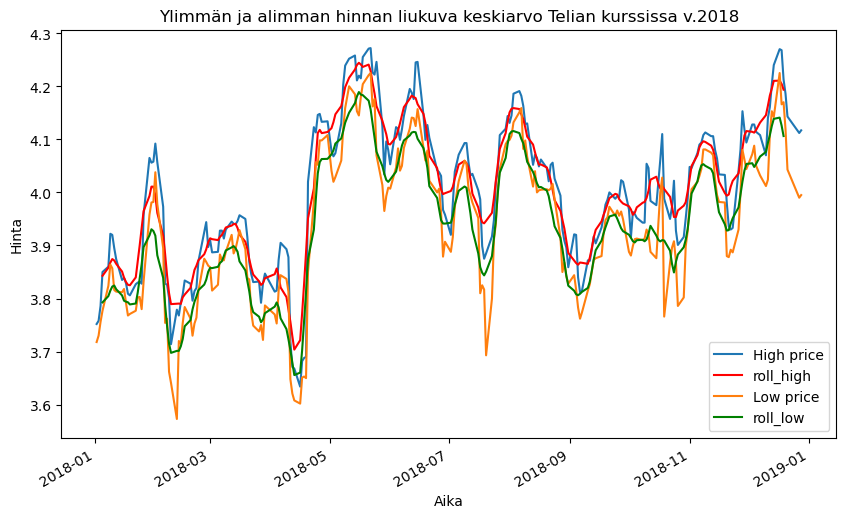

In [11]:
# Rolling Window operaattorin käyttö visualisoinnissa
fig, ax1 = plt.subplots(figsize=(10, 6))

df['High price'].plot(ax=ax1, label='High price')
df['High price'].rolling(8, center=True).mean().plot(ax=ax1, label='roll_high', color='red')

df['Low price'].plot(ax=ax1, label='Low price')
df['Low price'].rolling(8, center=True).mean().plot(ax=ax1, label='roll_low', color='green')

ax1.set_xlabel('Aika')
ax1.set_ylabel('Hinta')
ax1.legend(loc= 'lower right')
ax1.set_title('Ylimmän ja alimman hinnan liukuva keskiarvo Telian kurssissa v.2018')


plt.show()

#### Tuoreempien havaintojen painottaminen
Usein käytetään menetelmiä, missä annetaan enemmän painoa tuoreimmille havainnoille. Tällainen sarja adaptoituu nopeammin muutoksiin kuin rolling-operaattorin antama tasaisesti painotettu sarja.

ewm (exponentially weighted moving) -operaattori antaa tällaisen sarjan, span-parametri määrittää ikkunan koon.

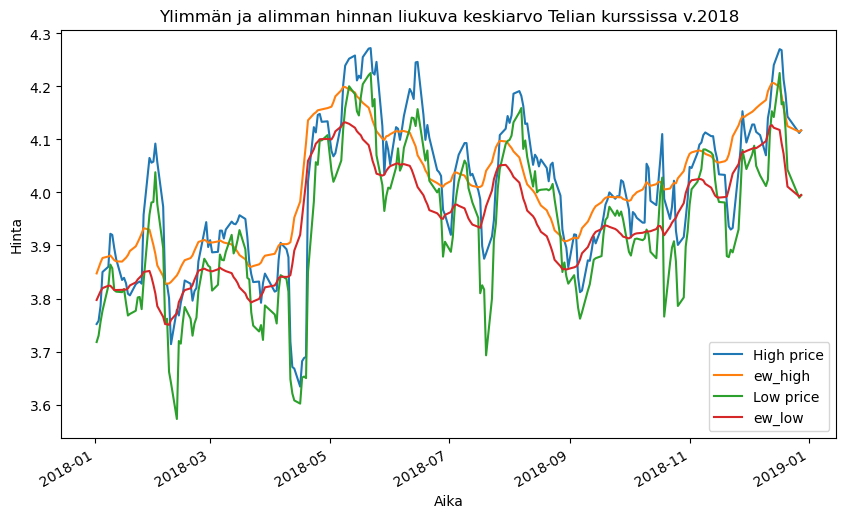

In [12]:
# TODO: ewn operaattorin käyttö visualisoinnissa
fig, ax1 = plt.subplots(figsize=(10, 6))

df['High price'].plot(ax=ax1, label='High price')
#df['High price'].rolling(8, center=True).mean().plot(ax=ax1, label='roll_high', color='red')
df['High price'].ewm(span=20).mean().plot(label='ew_high')

df['Low price'].plot(ax=ax1, label='Low price')
#df['Low price'].rolling(8, center=True).mean().plot(ax=ax1, label='roll_low', color='green')
df['Low price'].ewm(span=20).mean().plot(label='ew_low')

ax1.set_xlabel('Aika')
ax1.set_ylabel('Hinta')
ax1.legend(loc= 'lower right')
ax1.set_title('Ylimmän ja alimman hinnan liukuva keskiarvo Telian kurssissa v.2018')


plt.show()


## Outlierit ja korrelaatiot (T6.4 / 1p)
Toteuta seuraavat kohdat tässä tehtävässä:

- Datasta tulee tarkastaa ainakin jokaisen numeerisen sarakkeen merkittävät poikkeamat. Merkittävästi poikkeava arvo voidaan tarvittaessa korvata (millä tavalla?).
- Rivin poikkeamien havaitsemiseen voi käyttää 2% ja 98% prosenttipisteitä datasta
- laske myös Pearsonin korrelaatiokerroin sekä selityskerroin.

In [13]:
# laske poikkeamat (2% - 98%) ja korvaa outlier arvot.

import pandas as pd
import numpy as np

url = "https://student.labranet.jamk.fi/~pelju/datanav_k22/topic6/data/telia2018.csv"
df = pd.read_csv(url, sep= ';', decimal=',', parse_dates=['Date'], dayfirst=True, index_col='Date')
df = df.drop('Unnamed: 11', axis=1)

# Tarkista numeeriset sarakkeet
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Korvaa poikkeavat arvot medianilla. Poikkeavat arvot voisi korvata myös ala- ja yläarvojen sisällä olevilla arvoilla käyttäen df.clip()- metodia tai edellisellä tai seuraavalla validilla arvolla.
df[num_cols] = df[num_cols].apply(lambda x: np.where((x < np.percentile(x, 2)) | (x > np.percentile(x, 98)), x.median(), x))

print(df)

              Bid    Ask  Opening price  High price  Low price  Closing price  \
Date                                                                            
2018-12-28  4.078  4.083          4.000       4.117      3.995          4.076   
2018-12-27  4.002  4.008          4.087       4.112      3.990          3.995   
2018-12-21  4.123  4.125          4.120       4.143      4.043          4.122   
2018-12-20  4.169  4.174          4.151       4.186      4.119          4.163   
2018-12-19  4.183  4.186          4.170       4.213      4.170          4.180   
...           ...    ...            ...         ...        ...            ...   
2018-01-08  3.835  3.838          3.850       3.860      3.824          3.845   
2018-01-05  3.829  3.833          3.780       3.850      3.777          3.850   
2018-01-04  3.783  3.785          3.760       3.786      3.756          3.780   
2018-01-03  3.740  3.743          3.758       3.758      3.730          3.755   
2018-01-02  3.730  3.735    

#### Korrelaatio
laske **Pearsonin korrelaatiokerroin** sekä **selityskerroin**. Liitä mukaan myös Sanallinen tulkinta tuloksista.

#### Kahden muuttujan välinen riippuvuus
Kahden määrällisen muuttujan riippuvuutta tarkastellaan **hajontakaavion** ja **korrelaatiokertoimen** avulla.

#### Hajontakaavio
**Hajontakaavio** antaa nopea silmäyksen kahden muuttujan arvojen jakautumiseen.

- Yleensä ollaan kiinnostuneita liittyykö suuriin x:n arvoihin suuria tai pieniä y:n arvoja (korrelaatiota havaittavissa) vai satunnaisia y:n arvoja (ei merkittävää korrelaatiota).

Korrelaatiokerroin 'Opening price' ja 'Closing price' välillä:
0.86645967404011


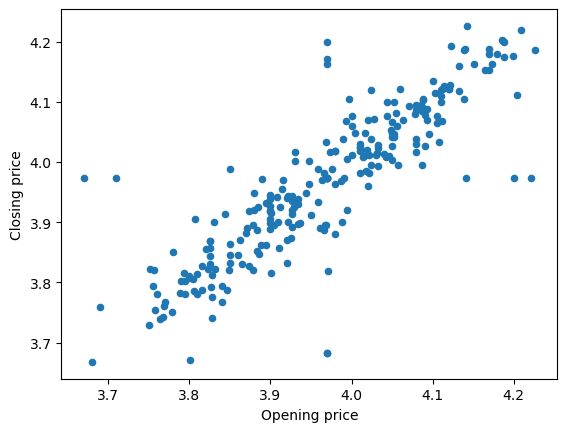

In [14]:
# Laske Opening price korrelaatio kenttään Closing price

corr = df['Opening price'].corr(df['Closing price'])

print("Korrelaatiokerroin 'Opening price' ja 'Closing price' välillä:")
print(corr)

# Hajontakaavio Opening price korrelaatio kenttään Closing price
df.plot.scatter('Opening price', 'Closing price')
plt.show()

## Sanallinen tulkinta (Pearsonin) korrelaatiokertoimen tuloksista
Koska korrelaatio on saamani laskun mukaan 0.86645967404011, voisi siitä tulkita, että kyseessä on vahva positiivinen korrelaatio. Opening price ja Closing price 
siis kasvavat ja vähenevät samanaikaisesti. Hajontakaaviosta on havaittavissa, että on vain muutamia poikkeuksia. Näissä korrelaatio on ollut negatiivista, eli Opening price ja Closing price liikkuvat vastakkaisiin suuntiin tai korrelaatiota ei ole juurikaan ollut.

In [15]:
# TODO: Laske Opening price korrelaatiot muihin kenttiin

opening_price_corr = df.corr()['Opening price']

print("Korrelaatiokerroin 'Opening price' ja muiden kenttien välillä:")
print(opening_price_corr)


Korrelaatiokerroin 'Opening price' ja muiden kenttien välillä:
Bid              0.866584
Ask              0.866462
Opening price    1.000000
High price       0.931603
Low price        0.883564
Closing price    0.866460
Average price    0.898255
Total volume    -0.408014
Turnover        -0.362651
Trades          -0.346607
Name: Opening price, dtype: float64


Ja vielä **Kaikkien luettujen** sarakkeiden väliset korrelaatiot

Korrelaatiokertoimet kaikkien kenttien välillä:
                    Bid       Ask  Opening price  High price  Low price  \
Bid            1.000000  0.999971       0.866584    0.907775   0.953549   
Ask            0.999971  1.000000       0.866462    0.907780   0.953494   
Opening price  0.866584  0.866462       1.000000    0.931603   0.883564   
High price     0.907775  0.907780       0.931603    1.000000   0.902803   
Low price      0.953549  0.953494       0.883564    0.902803   1.000000   
Closing price  0.999022  0.998991       0.866460    0.907106   0.951378   
Average price  0.931877  0.932021       0.898255    0.959041   0.948138   
Total volume  -0.403316 -0.404813      -0.408014   -0.393989  -0.445518   
Turnover      -0.359124 -0.360639      -0.362651   -0.344443  -0.400080   
Trades        -0.360622 -0.362206      -0.346607   -0.318418  -0.400612   

               Closing price  Average price  Total volume  Turnover    Trades  
Bid                 0.999022       0.931877   

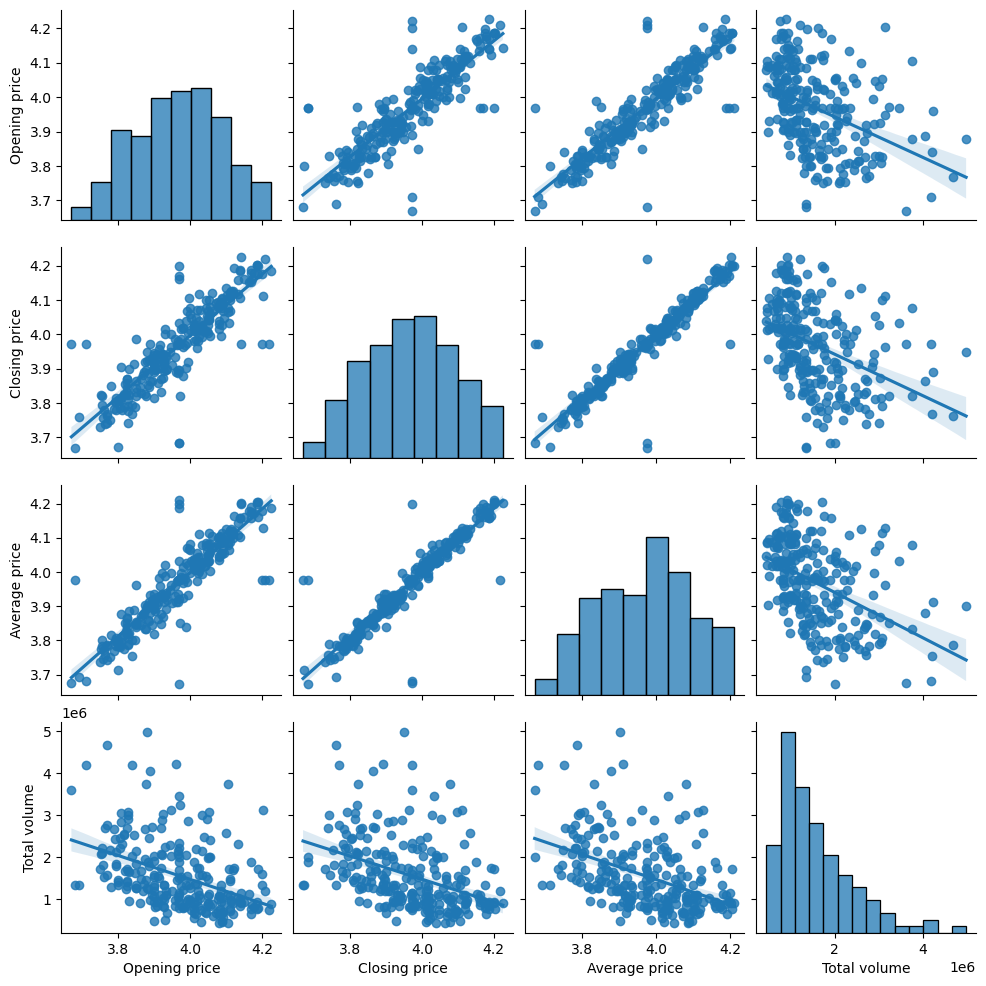

In [16]:
# TODO: Laske kaikkien kenttien korrelaatiot

corr = df.corr()

print("Korrelaatiokertoimet kaikkien kenttien välillä:")
print(corr)

import seaborn as sns

# Otin tähän muutamia kiinnostavia korrelaatioita pairplot kuvioon.
sns.pairplot(df[['Opening price', 'Closing price', 'Average price', 'Total volume']].dropna(), kind='reg')
plt.show()

Selityskerroin

In [17]:
# Laske Selityskerroin
r2 = df.corr().applymap(lambda x:"{:.1%}".format(x**2))

print("Selityskertoimet:")
print(r2)

Selityskertoimet:
                  Bid     Ask Opening price High price Low price  \
Bid            100.0%  100.0%         75.1%      82.4%     90.9%   
Ask            100.0%  100.0%         75.1%      82.4%     90.9%   
Opening price   75.1%   75.1%        100.0%      86.8%     78.1%   
High price      82.4%   82.4%         86.8%     100.0%     81.5%   
Low price       90.9%   90.9%         78.1%      81.5%    100.0%   
Closing price   99.8%   99.8%         75.1%      82.3%     90.5%   
Average price   86.8%   86.9%         80.7%      92.0%     89.9%   
Total volume    16.3%   16.4%         16.6%      15.5%     19.8%   
Turnover        12.9%   13.0%         13.2%      11.9%     16.0%   
Trades          13.0%   13.1%         12.0%      10.1%     16.0%   

              Closing price Average price Total volume Turnover  Trades  
Bid                   99.8%         86.8%        16.3%    12.9%   13.0%  
Ask                   99.8%         86.9%        16.4%    13.0%   13.1%  
Opening pri

## Selityskertoimen sanallinen tulkinta
Tulkitsen tilanteen näin: Bid sarakkeesta Average price sarakkeeseen (eli kaikki hinnat) selittävät toistensa vaihteluita enemmän kuin kolme viimeistä saraketta. Kun taas Total volume, Turnover ja Trades selittävät toistensa vaihteluita enemmän kuin hinnat. Esimerkiksi kokonaisvolyymi (Total volume) selittää suuresti miksi liikevaihto (Turnover) on mitä on. Tarjous (Bid) ja pyyntihinnat (Ask) vaikuttavat suuresti mikä on hinta pörssin sulkeutuessa.

#### HeatMap
**HeatMap** on 2-ulotteinen matriisikuvio, joka antaa visualisoinnin numeerisista tiedoista solujen muodossa. HeatMap-kartan värisävyt edustavat arvon suhdetta DataFrameen.

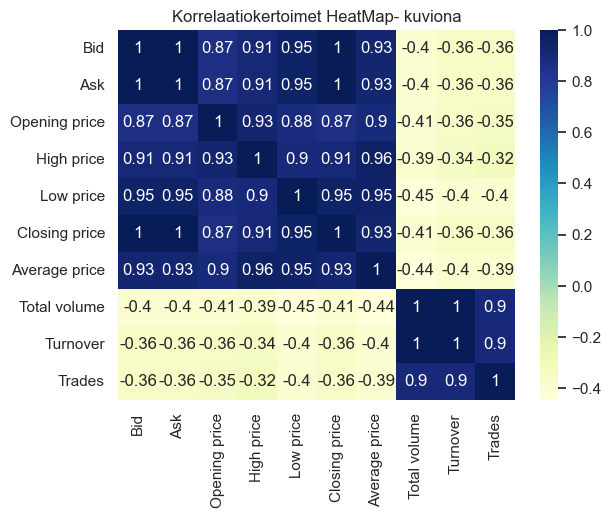

In [18]:
# TODO: visualisointi: Korrelaatiot ja/tai selityskertoimet HeatMap-kuviona
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

# Luo heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")

plt.title('Korrelaatiokertoimet HeatMap- kuviona')

plt.show()

### Regressiomalli (T6.5 / 1p)
Toteuta seuraavat kohdat tässä tehtävässä:

- Rakenna datasta Lineaarinen regressiomalli
- Lineeaarinen malli riippuvuudelle saadaan tuomalla sklearn.lineal_model-kirjastosta LinearRegression-luokka
- Visualisointiin voi käyttää seaborn-kirjaston regplot-metodia

Jos on hyvä motivaatio tehdä lisää data-analytiikkaa, niin voit vielä miettiä seuraavaa kohtaa:

- Vapaahtoinen extratehtävä: Rakenna datasta joku toinen regressiomalli
#### RegPlot

In [ ]:
# Visualisointi regressiomallille
sns.regplot(x = 'Opening price', y = 'Closing price', data = df)
plt.show()

#### Regressiomalli - Lineaarinen malli riippuvuudelle
Lineeaarinen malli riippuvuudelle saadaan tuomalla sklearn.lineal_model-kirjastosta LinearRegression-luokka.

- valitse **selittävä muuttuja (x)** sekä **selitettävä muuttuja (y)**

In [ ]:
from sklearn.linear_model import LinearRegression

# Regressiomalli: Lineaarinen malli valituille kentille.
# Perustele myös valinta. (Katsotehtävän lopusta)

malli = LinearRegression()
X = df[['Bid']]  # Huomaa tupluneliöt sarakkeiden nimen ympärillä
X.columns = ['Bid'] 
#x = df['Bid'].to_frame()
y = df['Average price']
malli.fit(X,y)

print(malli.coef_)
print(malli.intercept_)
print(malli.score(X,y))
print(malli.predict([[3.5], [4.5]]))

xfit = np.linspace(3.5, 4.5, 100)
Xfit = pd.DataFrame(xfit, columns = ['Bid'])
yfit = malli.predict(Xfit)
plt.scatter(X['Bid'],y)
plt.plot(xfit, yfit)
plt.xlabel('Tarjous (EUR)')
plt.ylabel('Keskihinta (EUR)')

plt.show()

### Valitsin tähän tehtävään Bid (pyyntihinta) ja Average price (keskihinta) sarakkeiden tiedot, koska on mielenkiintoista nähdä kuvassa, miten pyyntihinta on kohdannut keskihinnan. Siinähän se melkolailla pyörii pyyntihinnassa muutamaa poikkeusta lukuun ottamatta.

### Lisätehtävä: Tulosanalyysi
Tulkitse vielä kaikki saamasi tulokset sanallisesti.

- aineisto
- esikäsittely
- visualisointi
- korrelaatio
- aikasarjadata
- regressiomalli